In [177]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Set the path for each CSV file
whale_returns_path = Path("whale_returns.csv")
algo_returns_path = Path("algo_returns.csv")
sp_tsx_history_path = Path("sp_tsx_history.csv")


# Read in the data into Pandas DataFrames
whale_returns = pd.read_csv(whale_returns_path, parse_dates=True, infer_datetime_format=True, index_col='Date')
algo_returns = pd.read_csv(algo_returns_path, parse_dates=True, infer_datetime_format=True, index_col='Date')
sp_tsx_history = pd.read_csv(sp_tsx_history_path, parse_dates=True, infer_datetime_format=True, index_col='Date')

In [178]:
##  Whale Returns
## Read the Whale Portfolio daily returns and clean the data.
# Reading whale returns

whale_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [179]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [180]:
 # Identify Series count

whale_returns.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [181]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [182]:
# Drop nulls

whale_returns = whale_returns.dropna().copy()
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [183]:
## Validate no more missing values

whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [184]:
##  Algorithmic Daily Returns
## Read the algorithmic daily returns and clean the data.

algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [185]:
algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [186]:
# Identify Series count

algo_returns.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [187]:
# Count nulls

algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [188]:
# Drop nulls

algo_returns = algo_returns.dropna().copy()
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [189]:
## Validate no more missing values

algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [190]:
##  S&P TSX 60 Returns
## Read the S&P TSX 60 historic closing prices and 
## create a new daily returns DataFrame from the data.

sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [191]:
# Check Data Types

sp_tsx_history.dtypes

Close    object
dtype: object

In [192]:
## Convert data, replace $ and commas

sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace('$', '', regex=True)
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace(',', '', regex=True)

In [193]:
# Convert `Close` from `object` to `float`

sp_tsx_history["Close"]=sp_tsx_history["Close"].astype("float")
sp_tsx_history

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [194]:
# Check Data Types

sp_tsx_history.dtypes

Close    float64
dtype: object

In [195]:
# Calculate the daily returns 

sp_tsx_history = sp_tsx_history.pct_change()
sp_tsx_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [196]:
# Drop nulls

sp_tsx_history = sp_tsx_history.dropna().copy()
sp_tsx_history

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [197]:
# Count nulls

sp_tsx_history.isnull().sum()

Close    0
dtype: int64

In [198]:
# Rename `Close` Column to be specific to this portfolio.

sp_tsx_history = sp_tsx_history.rename(columns={
    
    "Close" : "TSX_60_Index",
    
    

})
sp_tsx_history.head()

,TSX_60_Index
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [199]:
## Combine Whale, Algorithmic, and S&P TSX 60 Returns

all_returns = pd.concat([whale_returns, algo_returns, sp_tsx_history], axis='columns', join='inner')
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX_60_Index
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<AxesSubplot:title={'center':'Daily Returns of the Portfolios'}, xlabel='Date'>

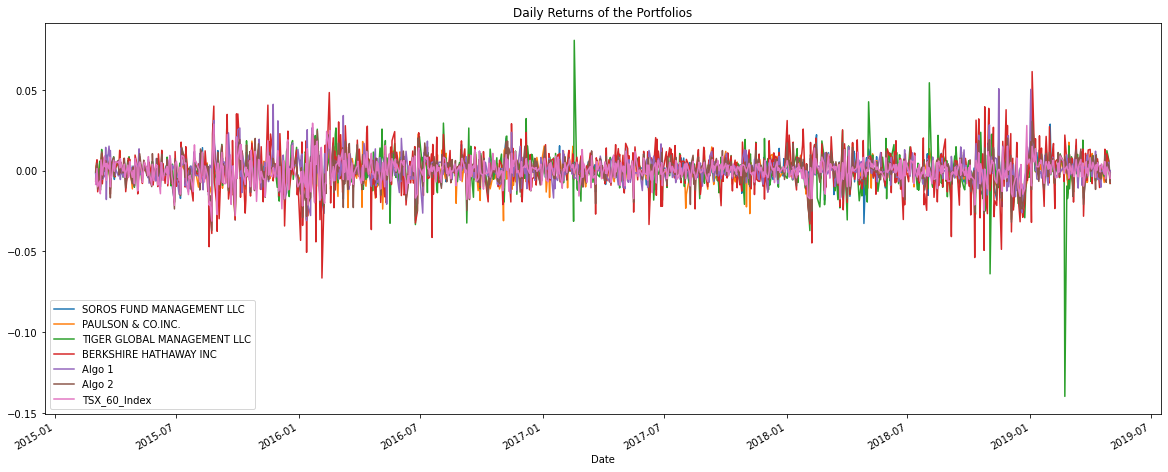

In [200]:
# Plot daily returns of all portfolios: all_returns

all_returns.plot(figsize=(20,8), title='Daily Returns of the Portfolios')

In [201]:
# Calculate cumulative returns of all portfolios: all_returns

cum_all_returns = (1 + all_returns).cumprod()
cum_all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX_60_Index
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<AxesSubplot:title={'center':'Cumulative Returns of all Portfolios'}, xlabel='Date'>

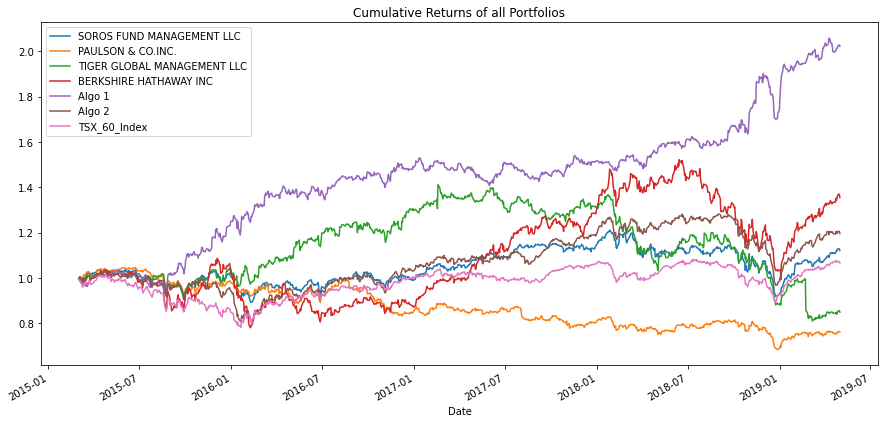

In [202]:
# Plot cumulative returns: all_returns

cum_all_returns.plot(figsize=(15,7), title='Cumulative Returns of all Portfolios')

<AxesSubplot:title={'center':'Box Plot of Risk for each Portfolio'}>

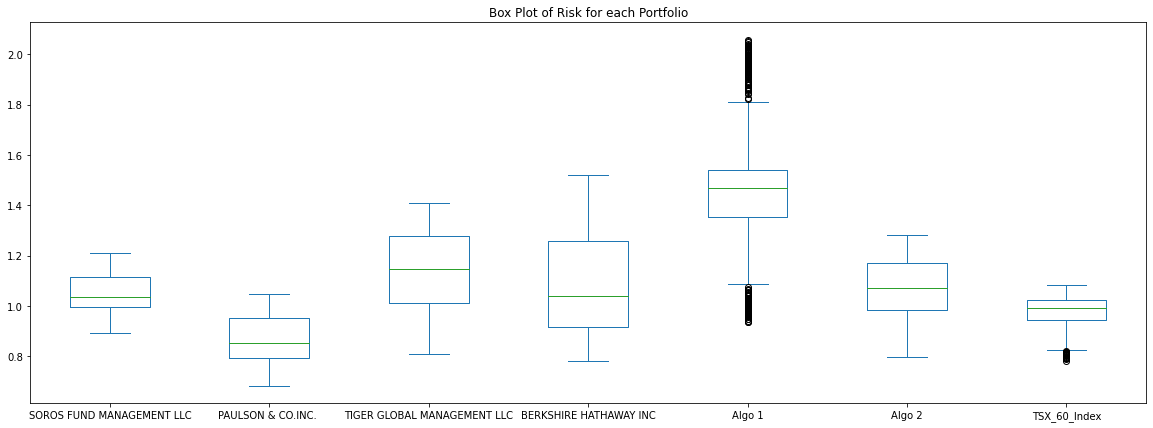

In [203]:
# Box plot to visually show risk

cum_all_returns.plot(kind='box', figsize=(20,7), title='Box Plot of Risk for each Portfolio')

In [204]:
# Calculate the daily standard deviations of all portfolios

daily_std = cum_all_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
TSX_60_Index                   0.064354
dtype: float64

In [205]:
# Determine which portfolios are riskier than the S&P TSX 60
# Sort standard deviation in descending order

des_daily_std = daily_std.sort_values(ascending=False)
des_daily_std

Algo 1                         0.258839
BERKSHIRE HATHAWAY INC         0.196871
TIGER GLOBAL MANAGEMENT LLC    0.148722
Algo 2                         0.116607
PAULSON & CO.INC.              0.090735
SOROS FUND MANAGEMENT LLC      0.070271
TSX_60_Index                   0.064354
dtype: float64

In [206]:
## Determine which portfolios are riskier than the S&P TSX 60

## CONCLUSION: ALL PORTFOLIOS IN WHALE_RETURNS FILE AND ALGO_RETURNS FILE ARE MORE RISKIER THAN S&P TSX 60 

In [207]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      1.115525
PAULSON & CO.INC.              1.440370
TIGER GLOBAL MANAGEMENT LLC    2.360896
BERKSHIRE HATHAWAY INC         3.125226
Algo 1                         4.108945
Algo 2                         1.851072
TSX_60_Index                   1.021582
dtype: float64

In [208]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Calculate rolling 21-day std. dev. moving average of all portfolios 

all_returns.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX_60_Index
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<AxesSubplot:title={'center':'Rolling 21-day standard deviation of all Portfolios'}, xlabel='Date'>

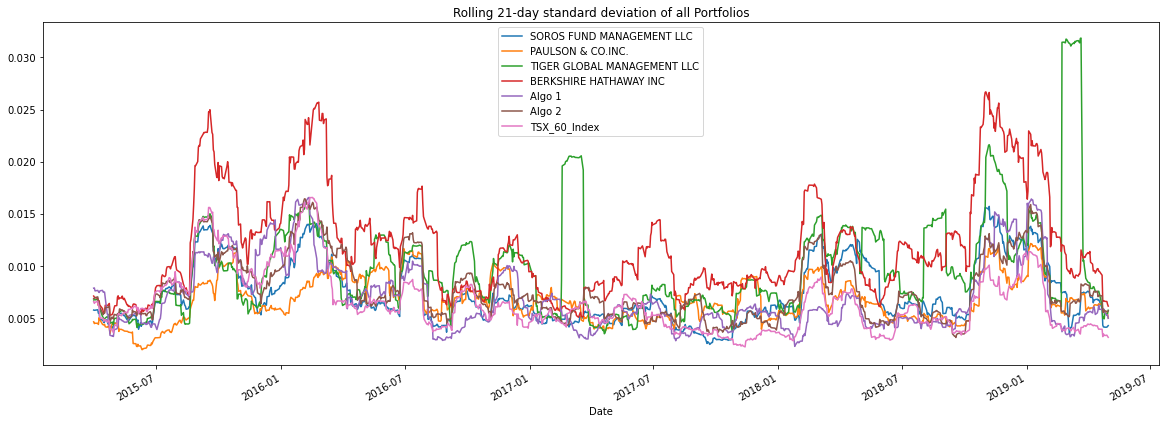

In [209]:
# Plot a rolling 21-day standard deviation of all portfolios

all_returns.rolling(window=21).std().plot(figsize=(20,7), title='Rolling 21-day standard deviation of all Portfolios')

In [210]:
# Calculate the correlation

corr_all_returns = all_returns.corr()
corr_all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX_60_Index
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
TSX_60_Index,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


In [211]:
# Display de correlation matrix

# Import the Seaborn library
import seaborn as sns

<AxesSubplot:>

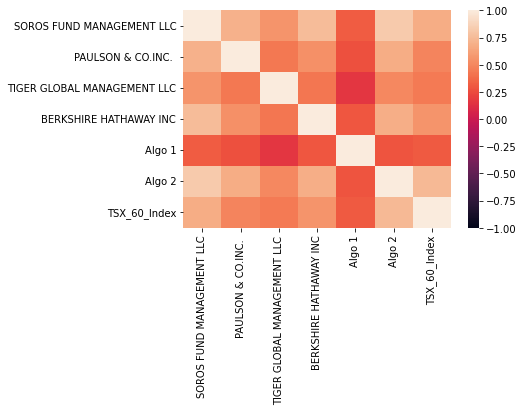

In [212]:
# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(corr_all_returns, vmin=-1, vmax=1)

In [213]:
# Calculate covariance of a single portfolio - Algo 1 vs TSX Index

covariance_algo_1 = all_returns["Algo 1"].cov(all_returns["TSX_60_Index"])
covariance_algo_1

1.656300071751294e-05

In [214]:
## Calculate variance of S&P TSX

variance_index = all_returns["TSX_60_Index"].var()
variance_index

4.9479515915131015e-05

In [215]:
# Computing beta of Algo 1

beta_algo_1 = covariance_algo_1 / variance_index
beta_algo_1

0.3347445990765628

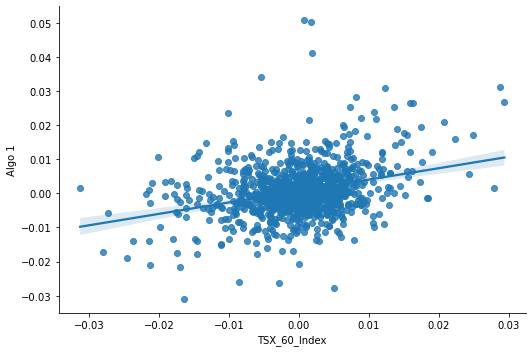

In [216]:
# Plot beta trend

sns.lmplot(x="TSX_60_Index", y="Algo 1", data=all_returns, aspect=1.5, fit_reg=True)

In [217]:
# Rolling Statistics Challenge: Exponentially Weighted Average
# Use `ewm` to calculate the rolling 21-day standard deviation ewm

all_returns.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX_60_Index
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


In [218]:
# Annualized Sharpe Ratios

sharpe_ratios = (all_returns.mean() * 252) / (daily_std * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.031937
PAULSON & CO.INC.             -0.042139
TIGER GLOBAL MANAGEMENT LLC   -0.010571
BERKSHIRE HATHAWAY INC         0.030427
Algo 1                         0.043730
Algo 2                         0.028335
TSX_60_Index                   0.021375
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

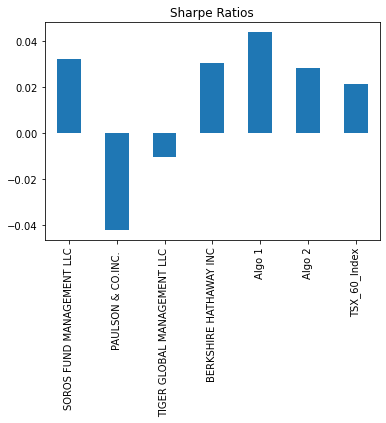

In [219]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot.bar(title="Sharpe Ratios")

In [220]:
## Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

## Cumulative Returns

cumulative_all_returns = (1 + all_returns).cumprod() - 1
cumulative_all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX_60_Index
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832
...,...,...,...,...,...,...,...
2019-04-25,0.118163,-0.245179,-0.159728,0.348932,1.011144,0.196390,0.070504
2019-04-26,0.127275,-0.238263,-0.149346,0.363007,1.017140,0.202677,0.072916
2019-04-29,0.128689,-0.236192,-0.144029,0.370126,1.027645,0.206080,0.072071


In [221]:
#### CONCLUSION - the two algorithmic strategies DID NOT outperform both the market (S&P TSX 60) and the whale portfolios.

# Conclusion #A - Algo 1 portfolio DID outperform both the Index and the Whale portfolios.
## (cont'd) By looking at the above cumulative returns, Algo 1 was the best performing portfolio
### (cont'd) outperforming both the Index and Whale portfolios.

# Conclusion #B - Algo 2 portfolio DID outperform the Index but DID NOT outperform the whale portfolios
## (cont'd) By looking at the above cumulative returns, Algo 2 underperformend Berkshire Hathaway portfolio

In [222]:
## Create Custom Portfolio

# Set the path for each CSV file
l_historical_path = Path("l_historical.csv")
otex_historical_path = Path("otex_historical.csv")
shop_historical_path = Path("shop_historical.csv")


# Read in the data into Pandas DataFrames
l_historical = pd.read_csv(l_historical_path, parse_dates=True, infer_datetime_format=True, index_col='Date')
otex_historical = pd.read_csv(otex_historical_path, parse_dates=True, infer_datetime_format=True, index_col='Date')
shop_historical = pd.read_csv(shop_historical_path, parse_dates=True, infer_datetime_format=True, index_col='Date')

In [223]:
## Reading data from Loblaws data file

l_historical.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [224]:
l_historical.count()

Symbol    501
Close     501
dtype: int64

In [225]:
l_historical.dtypes

Symbol     object
Close     float64
dtype: object

In [226]:
##Looking for Null Values

l_historical.isnull().sum()

Symbol    0
Close     0
dtype: int64

In [227]:
# Rename `Close` Column to be specific to this stock.

l_historical = l_historical.rename(columns={
    
    "Close" : "L",
    
    

})
l_historical.head()

,Symbol,L
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [228]:
## Delete column

l_historical = l_historical.drop(columns=['Symbol'])
l_historical

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86
...,...
2019-12-20,67.90
2019-12-23,67.68
2019-12-24,67.67


In [229]:
## Reading data from Open Text data file

otex_historical.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [230]:
otex_historical.count()

Symbol    501
Close     501
dtype: int64

In [231]:
otex_historical.dtypes

Symbol     object
Close     float64
dtype: object

In [232]:
## Looking for Null Values

otex_historical.isnull().sum()

Symbol    0
Close     0
dtype: int64

In [233]:
# Rename `Close` Column to be specific to this stock.

otex_historical = otex_historical.rename(columns={
    
    "Close" : "Otex",
    
    

})
otex_historical.head()

,Symbol,Otex
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [234]:
## Delete column

otex_historical = otex_historical.drop(columns=['Symbol'])
otex_historical

,Otex
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16
...,...
2019-12-20,58.68
2019-12-23,57.89
2019-12-24,57.44


In [235]:
## Reading data from Shopify data file

shop_historical.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [236]:
shop_historical.count()

Symbol    501
Close     501
dtype: int64

In [237]:
shop_historical.dtypes

Symbol     object
Close     float64
dtype: object

In [238]:
## Looking for Null Values

shop_historical.isnull().sum()

Symbol    0
Close     0
dtype: int64

In [239]:
# Rename `Close` Column to be specific to this stock.

shop_historical = shop_historical.rename(columns={
    
    "Close" : "shop",
    
    

})
shop_historical.head()

,Symbol,shop
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [240]:
## Delete column

shop_historical = shop_historical.drop(columns=['Symbol'])
shop_historical

,shop
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51
...,...
2019-12-20,513.22
2019-12-23,511.62
2019-12-24,525.39


In [241]:
# Combine all stocks in a single DataFrame

my_returns = pd.concat([l_historical, otex_historical, shop_historical], axis='columns', join='inner')
my_returns.head()

,L,Otex,shop
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [242]:
## To confirm date starts on 2018-01-02 (see .head() above) and ends at 2019-12-30 (see .tail() below)

my_returns.tail()

,L,Otex,shop
Date,,,
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39
2019-12-27,67.78,57.70,534.76
2019-12-30,67.33,57.19,517.79


In [243]:
## Calculate Daily returns and drop NAs

my_returns = my_returns.pct_change()
my_returns = my_returns.dropna().copy()
my_returns

,L,Otex,shop
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


In [244]:
## Calculate the weighted returns for the portfolio, 
## assuming an equal number of shares for each stock

## Set weights = [1/3, 1/3, 1/3]

weights = [0.33, 0.33, 0.33]
my_portfolio_returns = my_returns.dot(weights)
my_portfolio_returns

Date
2018-01-03    0.000559
2018-01-04    0.004472
2018-01-05   -0.003095
2018-01-08   -0.000987
2018-01-09   -0.000989
                ...   
2019-12-20    0.007420
2019-12-23   -0.006541
2019-12-24    0.006268
2019-12-27    0.007916
2019-12-30   -0.015580
Length: 500, dtype: float64

In [245]:
# Join your returns DataFrame to the original returns DataFrame. Rosh is the name of my portfolio returns.
# Also drop NaNs

all_returns['Rosh'] = my_portfolio_returns
total_returns = all_returns.dropna().copy()
total_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX_60_Index,Rosh
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000559
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004472
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003095
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000987
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000989
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003426
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003211
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003270


In [246]:
## Confirm NaNs are dropped

total_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
TSX_60_Index                   0
Rosh                           0
dtype: int64

In [247]:
# Calculate the daily standard deviations of all portfolios

total_daily_std = total_returns.std()
total_daily_std

SOROS FUND MANAGEMENT LLC      0.009177
PAULSON & CO.INC.              0.007203
TIGER GLOBAL MANAGEMENT LLC    0.013848
BERKSHIRE HATHAWAY INC         0.014328
Algo 1                         0.007561
Algo 2                         0.008672
TSX_60_Index                   0.006244
Rosh                           0.013991
dtype: float64

In [248]:
# Calculate the annualized standard deviation (252 trading days)

total_annualized_std = total_daily_std * np.sqrt(252)
total_annualized_std

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
TSX_60_Index                   0.099121
Rosh                           0.222102
dtype: float64

In [249]:
# Calculate rolling standard deviation

total_returns.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX_60_Index,Rosh
Date,,,,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370,0.008171
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321,0.008148
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356,0.007641


<AxesSubplot:xlabel='Date'>

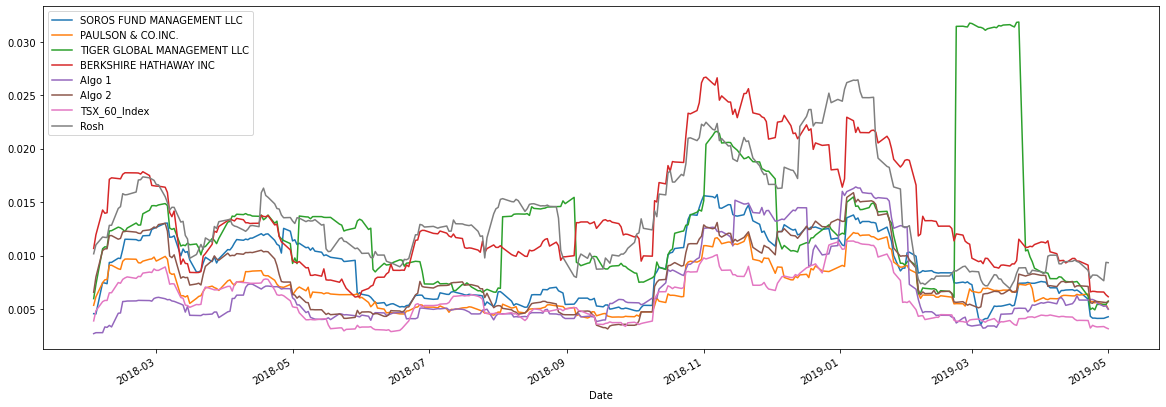

In [250]:
# Plot rolling standard deviation

total_returns.rolling(window=21).std().plot(figsize=(20,7))

In [251]:
# Calculate and plot the correlation

# Calculate the correlation

corr_total_returns = total_returns.corr()
corr_total_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX_60_Index,Rosh
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305526,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294697,0.783254,0.649817,0.647413
Algo 1,0.305526,0.320568,0.130845,0.294697,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
TSX_60_Index,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
Rosh,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


<AxesSubplot:>

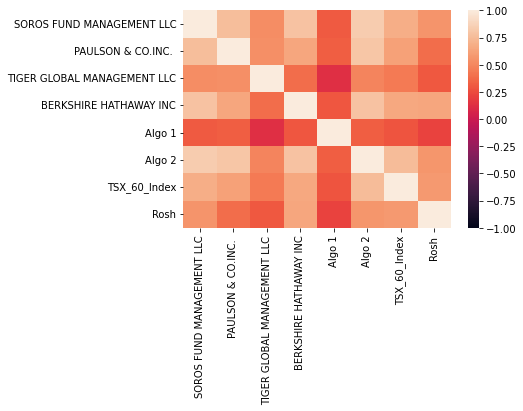

In [252]:
# Display de correlation matrix

sns.heatmap(corr_total_returns, vmin=-1, vmax=1)

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Rosh vs. TSX_60_Index'}, xlabel='Date'>

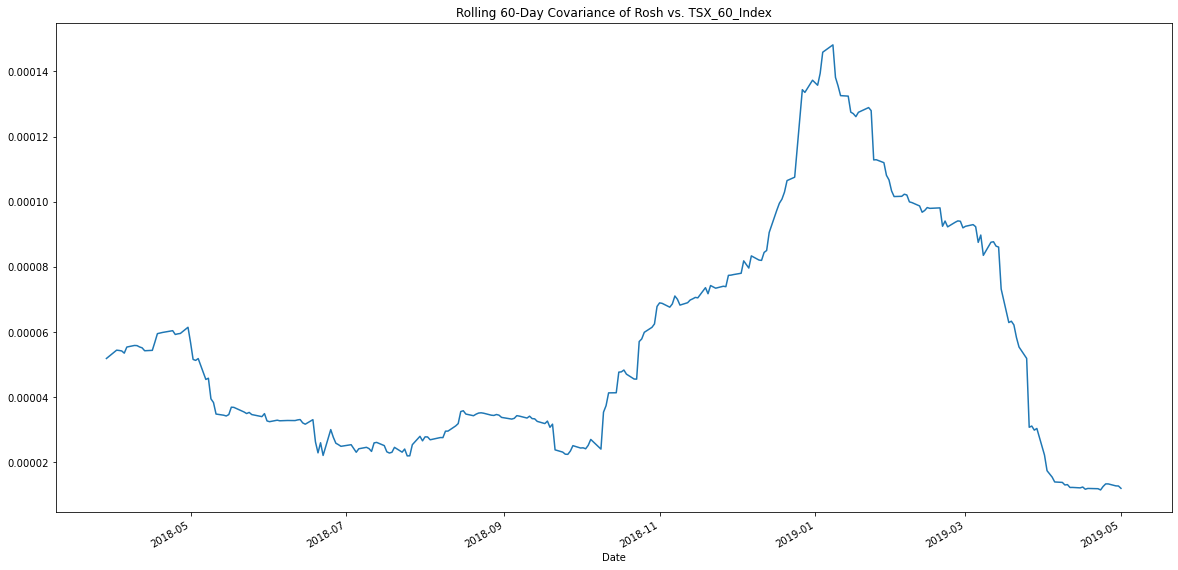

In [253]:
## Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P TSX 60

# Calculate 60-day rolling covariance of Rosh vs. TSX Index and plot the data

rolling_covariance = total_returns["Rosh"].rolling(window=60).cov(total_returns["TSX_60_Index"])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Rosh vs. TSX_60_Index')

<AxesSubplot:title={'center':'Rolling 60-Day Variance of S&P TSX 60 Returns'}, xlabel='Date'>

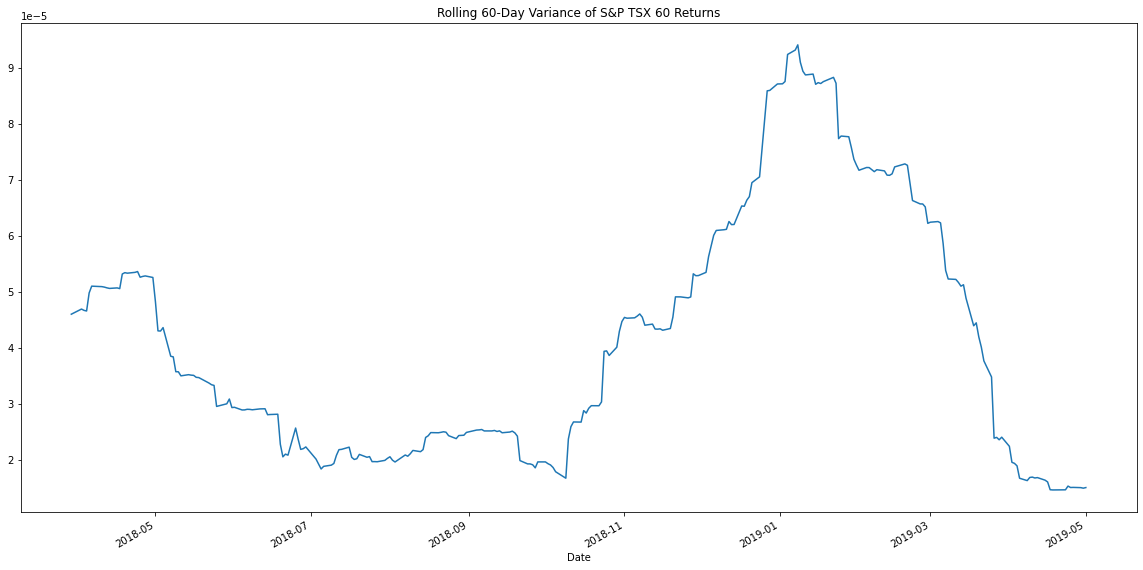

In [254]:
## Calculate 60-day rolling variance of Rosh vs. S&P TSX 60 and plot the data

rolling_variance = total_returns['TSX_60_Index'].rolling(window=60).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 60-Day Variance of S&P TSX 60 Returns')

In [255]:
## Calculate 60-day rolling beta of Rosh compared to the S&P TSX 60 and plot the data

# Calculate 60-day rolling beta of Rosh compared to the S&P TSX 60

rolling_beta = rolling_covariance / rolling_variance
rolling_beta

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2019-04-25    0.886664
2019-04-26    0.885536
2019-04-29    0.847340
2019-04-30    0.850912
2019-05-01    0.796924
Length: 328, dtype: float64

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Rosh'}, xlabel='Date'>

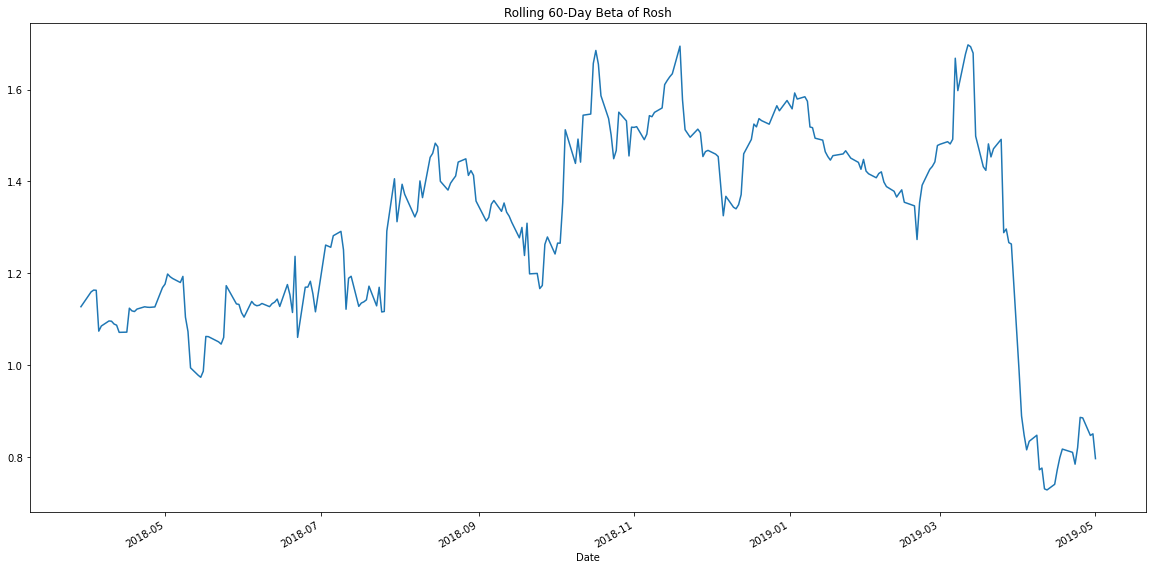

In [256]:
# Plot the 60-day rolling beta of Rosh compared to S&P TSX 60

rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Rosh')

In [257]:
## Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

# Calculate Annualzied Sharpe Ratios

sharpe_total_ratios = (total_returns.mean() * 252) / (total_daily_std * np.sqrt(252))
sharpe_total_ratios

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396281
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
TSX_60_Index                   0.034651
Rosh                           1.564547
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

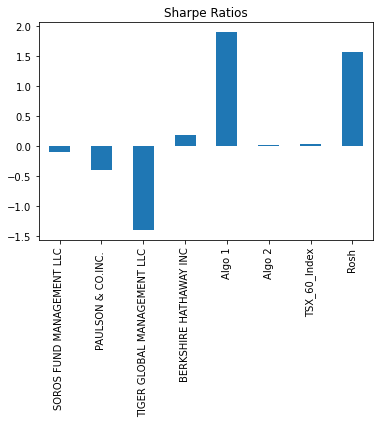

In [258]:
# Visualize the sharpe ratios as a bar plot

sharpe_total_ratios.plot.bar(title="Sharpe Ratios")

In [259]:
## The above chart shows that the Algo 1 and Rosh portfolios had the highest Sharpe Ratios versus the other portfolios.
### Algo 1 had the highest Sharpe ratio, Rosh portfolio had the 2nd highest Sharpe ratio.

In [260]:
# Calculate cumulative returns of all portfolios: total_returns

cum_total_returns = (1 + total_returns).cumprod()
cum_total_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX_60_Index,Rosh
Date,,,,,,,,
2018-01-03,1.004658,1.000027,1.001979,1.005676,0.999110,1.008175,1.003774,1.000559
2018-01-04,1.003739,1.004224,1.012743,1.009764,0.998197,1.012504,1.006312,1.005034
2018-01-05,1.007826,1.005050,1.013489,1.032002,0.994364,1.018990,1.002419,1.001923
2018-01-08,1.012333,1.001293,1.018643,1.035547,0.996008,1.019660,1.000470,1.000934
2018-01-09,1.011293,1.002166,1.020465,1.036280,0.995008,1.017528,1.000567,0.999944
...,...,...,...,...,...,...,...,...
2019-04-25,0.967784,0.927037,0.643282,1.020501,1.326260,0.992409,1.002523,1.472896
2019-04-26,0.975671,0.935530,0.651230,1.031149,1.330213,0.997625,1.004783,1.477625
2019-04-29,0.976895,0.938074,0.655300,1.036535,1.337141,1.000448,1.003991,1.482457


<AxesSubplot:title={'center':'Cumulative Returns of all Portfolios'}, xlabel='Date'>

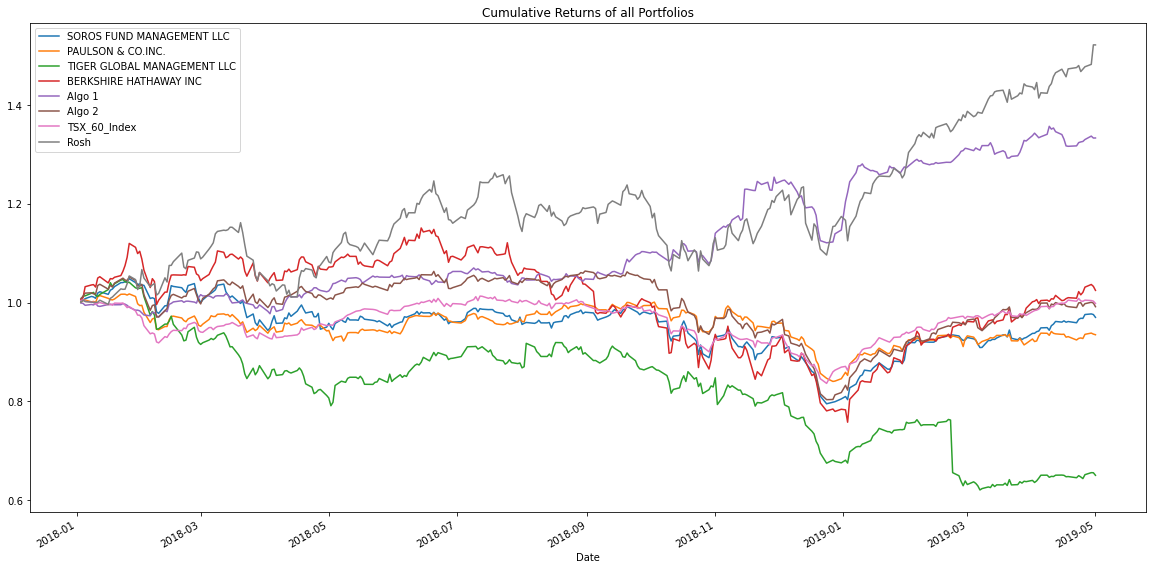

In [261]:
# Plot cumulative returns: total_returns

cum_total_returns.plot(figsize=(20,10), title='Cumulative Returns of all Portfolios')

In [262]:
# Use the `cumprod` function to calculate the cumulative returns

cumulative_total_returns = (1 + total_returns).cumprod() - 1
cumulative_total_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX_60_Index,Rosh
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000559
2018-01-04,0.003739,0.004224,0.012743,0.009764,-0.001803,0.012504,0.006312,0.005034
2018-01-05,0.007826,0.005050,0.013489,0.032002,-0.005636,0.018990,0.002419,0.001923
2018-01-08,0.012333,0.001293,0.018643,0.035547,-0.003992,0.019660,0.000470,0.000934
2018-01-09,0.011293,0.002166,0.020465,0.036280,-0.004992,0.017528,0.000567,-0.000056
...,...,...,...,...,...,...,...,...
2019-04-25,-0.032216,-0.072963,-0.356718,0.020501,0.326260,-0.007591,0.002523,0.472896
2019-04-26,-0.024329,-0.064470,-0.348770,0.031149,0.330213,-0.002375,0.004783,0.477625
2019-04-29,-0.023105,-0.061926,-0.344700,0.036535,0.337141,0.000448,0.003991,0.482457


In [263]:
##  How did your portfolio do?

## CONCLUSION - My portfolio [Rosh Portfolio] outperformed the Index, the whale portfolios and the algorithmic portfolios during that time period.
### (cont'd) By looking at the above cumulative returns, Rosh portfolio [my portfolio] had the best cumulative returns than the other portfolios.